In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
plt.style.use('fivethirtyeight')

In [39]:
data = np.load('src/data/datacln.npy', allow_pickle = True)

In [81]:
df = pd.DataFrame(data, columns = ['title','author', 'isbn', 'book_type', 'pages', 'userid', 'user_rating', 'num_rate', 'av_rate'])  
df.head()

#get rid of any users who haven't added any books, and any added books with no user rating
dfwr = df.dropna(axis=0)

actually_rated = dfwr['user_rating'] != 0
dfwr = dfwr[actually_rated]
dfwr.info()
#dfwr.head()
#dfwr.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50109 entries, 2 to 82720
Data columns (total 9 columns):
title          50109 non-null object
author         50109 non-null object
isbn           50109 non-null object
book_type      50109 non-null object
pages          50109 non-null object
userid         50109 non-null object
user_rating    50109 non-null object
num_rate       50109 non-null object
av_rate        50109 non-null object
dtypes: object(9)
memory usage: 3.8+ MB


### So, in our first dataset, the first 1402 records in my database were sequential, from review 1 upward, and that is...not properly randomized. Having failed to take those out of the dataset before running the properly randomized scraper, I had to remove them here. Run the block below ONLY if you want to save your datacln.npy missing the first 1402 (or, I suppose, however many you chose to remove) records from your dataset.  

In [38]:
good_data = df['userid'] > 1402
df = df[good_data]
np.save('src/data/datacln.npy', df)

### Okay, back to normally scheduled data handling. 

In [57]:
dfwr.head()

,title,author,isbn,book_type,pages,userid,user_rating,num_rate,av_rate
2,The Hunger Games,"Collins, Suzanne",9780439023481,format,374,22197300,5,5936319,4.33
3,Divergent,"Roth, Veronica",9780062024039,format,487,22197300,5,2706147,4.2
4,Shiver,"Stiefvater, Maggie",9780545123266,format,392,22197300,5,411613,3.77
5,Good Omens: The Nice and Accurate Prophecies o...,"Pratchett, Terry",,format,491,22197300,5,476232,4.25
6,The Host,"Meyer, Stephenie",9780316068048,format,620,22197300,5,848921,3.84


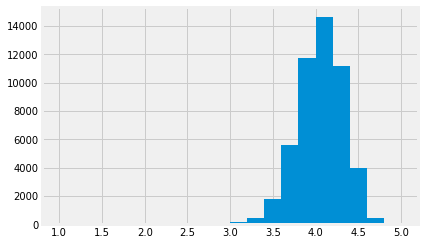

In [58]:
dfwr['av_rate'].hist(bins = 20)
plt.show()



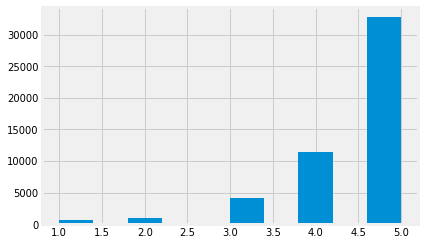

In [28]:
dfwr['user_rating'].hist()
plt.show()

# Hypothesis Testing

### Null hypothesis

The null hypothesis is that goodreads raters rate books under 4 stars more often than they rate books 4 and 5 stars. 

P(x<4) > .5

In [55]:
null_hyp = stats.norm.rvs(loc=4, scale=np.std(sample)/np.sqrt(len(sample)), size=len(sample), random_state=None)
null_mean = np.mean(null_hyp)

###  Alternative Hypothesis

the alternative hypothesis is that goodreads raters rate books 4 and 5 more than 1,2 or 3 stars

P(x>=4)>.5

In [54]:
#sample is all of our user ratings, sampling was done as part of the scraping randomized list operation
sample =dfwr['user_rating']

dumby = sample
samp_mean = np.mean(sample)

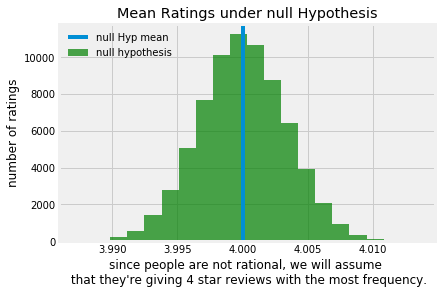

In [30]:
#Graph the null hypothesis

fig, ax = plt.subplots()

ax.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')


ax.set_title('Mean Ratings under null Hypothesis')
ax.set_ylabel('number of ratings')
ax.set_xlabel("since people are not rational, we will assume \n that they're giving 4 star reviews with the most frequency.")
ax.axvline(null_mean, label = 'null Hyp mean')



# ax[1] = plt.hist(sample, color = 'c', bins = 5, alpha = .4, label ='sample')

# fig.set_title ('sampled ratings against hypothesised ratings')


ax.legend(loc='upper left', frameon = False)
# fig.xlabel('number of ratings')
plt.show()

fig.savefig('img/hypothesis_test', dpi = 300, bbox_inches = 'tight', transparent = True)

Graph the data

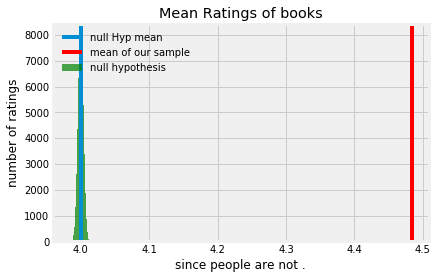

In [56]:
#Graph the null hypothesis with sample mean

fig, ax = plt.subplots()

ax.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')


ax.set_title('Mean Ratings of books')
ax.set_ylabel('number of ratings')
ax.set_xlabel("since people are not .")
ax.axvline(x=np.mean(null_hyp), label = 'null Hyp mean')
ax.axvline(samp_mean, label= 'mean of our sample', color = 'r')



# ax[1] = plt.hist(sample, color = 'c', bins = 5, alpha = .4, label ='sample')

# fig.set_title ('sampled ratings against hypothesised ratings')


ax.legend(loc='upper left', frameon = False)
# fig.xlabel('number of ratings')
plt.show()

#fig.savefig('img/hypothesis_test', dpi = 300, bbox_inches = 'tight', transparent = True)

In [59]:
stats.ttest_1samp(sample, 4, axis=0, nan_policy='propagate')

Ttest_1sampResult(statistic=127.26667480359093, pvalue=0.0)

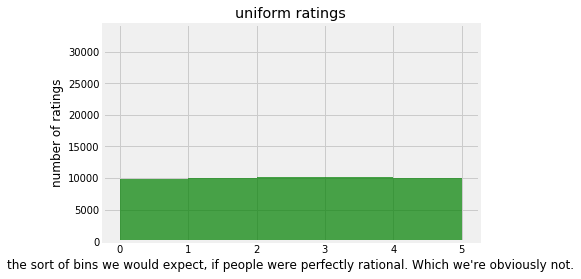

In [33]:
# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
uniform_hyp = stats.uniform.rvs(loc=0, scale=5, size=len(sample), random_state=None)
fig, ax = plt.subplots()

ax.hist(uniform_hyp, color = 'g', bins = 5, alpha = .7, label = 'null hypothesis')
ax.hist(sample, color = 'c', bins = 5, alpha = .0, label ='sample')



ax.set_title('uniform ratings')
ax.set_ylabel('number of ratings')
ax.set_xlabel("the sort of bins we would expect, if people were perfectly rational. Which we're obviously not.")

#ax.legend(loc='upper left', frameon = False)
#fig.xlabel('number of ratings')
plt.show()

#fig.savefig('img/uniform_rational_graph2', dpi = 300, bbox_inches = 'tight', transparent = True)

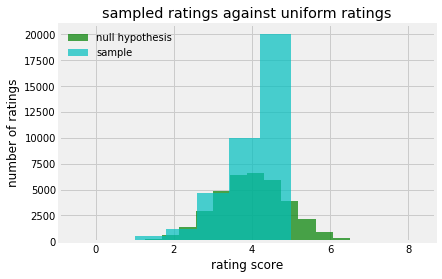

In [8]:
# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
null_hyp = stats.norm.rvs(loc=4, scale=np.std(sample), size=len(sample), random_state=None)
fig, ax = plt.subplots()

ax = plt.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')
ax = sample.hist(color = 'c', bins = 5, alpha = .7, label ='sample')

ax.set_title('sampled ratings against uniform ratings')
ax.set_ylabel('number of ratings')
ax.set_xlabel('rating score')

ax.legend(loc='upper left', frameon = False)
#fig.xlabel('number of ratings')
plt.show()

fig.savefig('img/hypothesis_graph', dpi = 300, bbox_inches = 'tight', transparent = True)

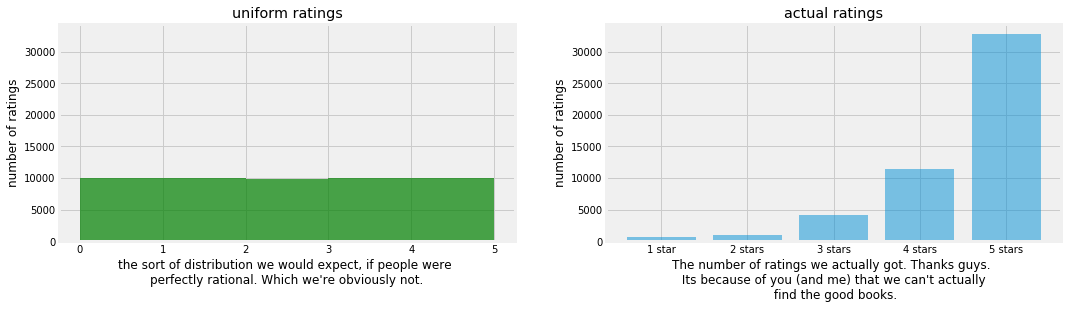

In [101]:
# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
uniform_hyp = stats.uniform.rvs(loc=0, scale=5, size=len(sample), random_state=None)
fig, ax = plt.subplots(1,2, figsize=(16,4))

ax[0].hist(uniform_hyp, color = 'g', bins = 5, alpha = .7, label = 'null hypothesis')
ax[0].hist(sample, color = 'c', bins = 5, alpha = .0, label ='sample')


ax[0].set_title('uniform ratings')
ax[0].set_ylabel('number of ratings')
ax[0].set_xlabel("the sort of distribution we would expect, if people were \nperfectly rational. Which we're obviously not.")

# ax[1].hist(sample, color = 'c', bins = 5, alpha = .5, label ='sample')
objects = ('*', '**', '***', '****', '*****')
y_pos = np.arange(len(objects))
performance = [star1,star2,star3,star4,star5]

ax[1].bar(y_pos, performance, align='center', alpha=0.5)

ax[1].set_xticklabels(['t','1 star','2 stars', '3 stars', '4 stars', '5 stars', 't'])
ax[1].set_title('actual ratings')
ax[1].set_ylabel('number of ratings')
ax[1].set_xlabel("The number of ratings we actually got. Thanks guys. \n Its because of you (and me) that we can't actually \n find the good books.")

#ax.legend(loc='upper left', frameon = False)
#fig.xlabel('number of ratings')
plt.show()

#fig.savefig('img/Thanks_guys', dpi = 300, bbox_inches = 'tight', transparent = True)

In [89]:
star1 =dfwr[dfwr['user_rating'] == 1]['user_rating'].count()
star2 =dfwr[dfwr['user_rating'] == 2]['user_rating'].count()
star3 =dfwr[dfwr['user_rating'] == 3]['user_rating'].count()
star4 =dfwr[dfwr['user_rating'] == 4]['user_rating'].count()
star5 =dfwr[dfwr['user_rating'] == 5]['user_rating'].count()
star5

32763

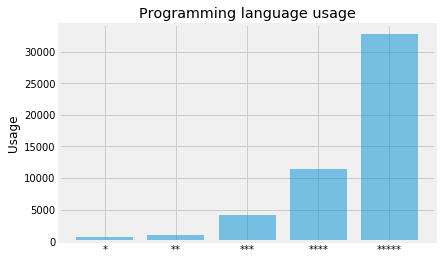

In [90]:
# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
null_hyp = stats.norm.rvs(loc=4, scale=np.std(sample), size=len(sample), random_state=None)
# fig, ax = plt.subplots()

# #ax = plt.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')
# ax = sample.hist(color = 'c', bins = 5, alpha = .7, label ='sample')

# ax.set_title('histogram of one to five star ratings given')
# ax.set_ylabel('number of ratings')
# ax.set_xlabel('rating score')



# ax.legend(loc='upper left', frameon = False)
# #fig.xlabel('number of ratings')
# plt.show()

#fig.savefig('img/hypothesis_graph', dpi = 300, bbox_inches = 'tight', transparent = True)


objects = ('*', '**', '***', '****', '*****')
y_pos = np.arange(len(objects))
performance = [star1,star2,star3,star4,star5]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

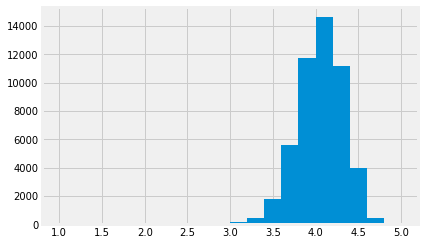

In [48]:
dfwr['av_rate'].hist(bins = 20)
